# TextVQA Dataset Analysis

In this notebook, we will take a look at the dataset of textvqa. We will analyze the results of baseline LoRRA algorithm on this dataset. This will give us hints on improving the algorithm


### Image validation set



In [64]:
!wget https://dl.fbaipublicfiles.com/textvqa/data/TextVQA_0.5_val.json

--2019-07-07 03:46:57--  https://dl.fbaipublicfiles.com/textvqa/data/TextVQA_0.5_val.json
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.20.6.166, 104.20.22.166, 2606:4700:10::6814:6a6, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.20.6.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15782960 (15M) [text/plain]
Saving to: ‘TextVQA_0.5_val.json’

TextVQA_0.5_val.jso 100%[===================>]  15.05M  85.1MB/s    in 0.2s    

2019-07-07 03:46:57 (85.1 MB/s) - ‘TextVQA_0.5_val.json’ saved [15782960/15782960]



### Baseline result.

Let's get the baseline results from already uploaded results file from my [github](https://raw.githubusercontent.com/mandliya/textvqa/master/result.json).

In [76]:
!wget https://raw.githubusercontent.com/mandliya/textvqa/master/result.json

--2019-07-07 03:55:18--  https://raw.githubusercontent.com/mandliya/textvqa/master/result.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 235268 (230K) [text/plain]
Saving to: ‘result.json’

result.json         100%[===================>] 229.75K  --.-KB/s    in 0.03s   

2019-07-07 03:55:18 (7.86 MB/s) - ‘result.json’ saved [235268/235268]



### Analysis

In [177]:
import pandas as pd

results = pd.read_json('result.json')
results.head()

answer  question_id
0      the moon        38533
1           yes        35812
2  unanswerable        38213
3             6        36121
4  unanswerable        37023

In [178]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
answer         5000 non-null object
question_id    5000 non-null int64
dtypes: int64(1), object(1)
memory usage: 78.2+ KB


In [179]:
val = pd.read_json('TextVQA_0.5_val.json')
val.head()

dataset_type dataset_name  dataset_version  \
0          val      textvqa              0.5   
1          val      textvqa              0.5   
2          val      textvqa              0.5   
3          val      textvqa              0.5   
4          val      textvqa              0.5   

                                                data  
0  {'question': 'what is the brand of this camera...  
1  {'question': 'what does the small white text s...  
2  {'question': 'what kind of beer is this?', 'im...  
3  {'question': 'what brand liquor is on the righ...  
4  {'question': 'how long has the drink on the ri...

In [180]:
val.drop(['dataset_type', 'dataset_name', 'dataset_version'], axis=1, inplace=True)

In [182]:
val.data[0]

{'question': 'what is the brand of this camera?',
 'image_id': '003a8ae2ef43b901',
 'image_classes': ['Cassette deck',
  'Printer',
  'Medical equipment',
  'Computer mouse',
  'Scale',
  'Telephone',
  'Camera',
  'Ipod',
  'Remote control'],
 'flickr_original_url': 'https://farm2.staticflickr.com/4/5566811_bc00d504a6_o.jpg',
 'flickr_300k_url': 'https://farm2.staticflickr.com/4/5566811_bc00d504a6_o.jpg',
 'image_width': 1024,
 'image_height': 664,
 'answers': ['nous les gosses',
  'dakota',
  'clos culombu',
  'dakota digital',
  'dakota',
  'dakota',
  'dakota digital',
  'dakota digital',
  'dakota',
  'dakota'],
 'ocr_tokens': ['DAKOTA', 'DIGITAL', 'Single-Use', 'Camera', 'digrtal'],
 'ocr_info': [{'word': 'DAKOTA',
   'bounding_box': {'top_left_x': 0.14370192587376,
    'top_left_y': 0.1531290858984,
    'width': 0.12223755568266,
    'height': 0.071707926690578,
    'rotation': 0,
    'yaw': 0.92349565029144,
    'roll': 0,
    'pitch': 0}},
  {'word': 'DIGITAL',
   'bounding_bo

### Normalize the json

In [183]:
from pandas.io.json import json_normalize
val = json_normalize(val.data)

In [184]:
val.head()

answers  \
0  [nous les gosses, dakota, clos culombu, dakota...   
1  [copenhagen, copenhagen, copenhagen, copenhage...   
2  [ale, sublimely self-righteous ale, stone, ale...   
3  [bowmore , bowmore, bowmore, bowmore, bowmore,...   
4  [10 years, 10 year, 10 years, 10 years , 10 ye...   

                                     flickr_300k_url  \
0  https://farm2.staticflickr.com/4/5566811_bc00d...   
1  https://c7.staticflickr.com/5/4136/4920614800_...   
2  https://c8.staticflickr.com/4/3519/5721283932_...   
3  https://c6.staticflickr.com/6/5590/15223897342...   
4  https://c6.staticflickr.com/6/5590/15223897342...   

                                 flickr_original_url  \
0  https://farm2.staticflickr.com/4/5566811_bc00d...   
1  https://farm5.staticflickr.com/4136/4920614800...   
2  https://farm2.staticflickr.com/3519/5721283932...   
3  https://farm5.staticflickr.com/5590/1522389734...   
4  https://farm5.staticflickr.com/5590/1522389734...   

                                       image_classes  image_height  \
0  [Cassette deck, Printer, Medical equipment, Co...           664   
1                                        [Billboard]           683   
2                   [Surfboard, Drink, Bottle, Wine]          1024   
3                        [Beer, Drink, Bottle, Wine]           576   
4                        [Beer, Drink, Bottle, Wine]           576   

           image_id  image_width  \
0  003a8ae2ef43b901         1024   
1  b9dc400eb20bad64         1024   
2  2b538a43dd933fc1         1024   
3  831bcec304a17054         1024   
4  831bcec304a17054         1024   

                                            ocr_info  \
0  [{'word': 'DAKOTA', 'bounding_box': {'top_left...   
1  [{'word': 'DRUPALCON', 'bounding_box': {'top_l...   
2  [{'word': 'NINK', 'bounding_box': {'top_left_x...   
3  [{'word': 'IGNET', 'bounding_box': {'top_left_...   
4  [{'word': 'IGNET', 'bounding_box': {'top_left_...   

                                          ocr_tokens  \
0     [DAKOTA, DIGITAL, Single-Use, Camera, digrtal]   
1                   [DRUPALCON, ALCON, COPENHAGEN, ]   
2  [NINK, SEWING, CC, STON, DOUE, Sublumely, SELF...   
3  [IGNET, OWMOR, MORANGIE, MORANGIE, EMORANGIE, ...   
4  [IGNET, OWMOR, MORANGIE, MORANGIE, EMORANGIE, ...   

                                         question  question_id  \
0               what is the brand of this camera?        34602   
1           what does the small white text spell?        34603   
2                      what kind of beer is this?        34604   
3              what brand liquor is on the right?        34605   
4  how long has the drink on the right been aged?        34606   

                                     question_tokens set_name  
0           [what, is, the, brand, of, this, camera]      val  
1       [what, does, the, small, white, text, spell]      val  
2                   [what, kind, of, beer, is, this]      val  
3          [what, brand, liquor, is, on, the, right]      val  
4  [how, long, has, the, drink, on, the, right, b...      val

In [185]:
val = pd.merge(val, results, on='question_id')
val.head()

answers  \
0  [nous les gosses, dakota, clos culombu, dakota...   
1  [copenhagen, copenhagen, copenhagen, copenhage...   
2  [ale, sublimely self-righteous ale, stone, ale...   
3  [bowmore , bowmore, bowmore, bowmore, bowmore,...   
4  [10 years, 10 year, 10 years, 10 years , 10 ye...   

                                     flickr_300k_url  \
0  https://farm2.staticflickr.com/4/5566811_bc00d...   
1  https://c7.staticflickr.com/5/4136/4920614800_...   
2  https://c8.staticflickr.com/4/3519/5721283932_...   
3  https://c6.staticflickr.com/6/5590/15223897342...   
4  https://c6.staticflickr.com/6/5590/15223897342...   

                                 flickr_original_url  \
0  https://farm2.staticflickr.com/4/5566811_bc00d...   
1  https://farm5.staticflickr.com/4136/4920614800...   
2  https://farm2.staticflickr.com/3519/5721283932...   
3  https://farm5.staticflickr.com/5590/1522389734...   
4  https://farm5.staticflickr.com/5590/1522389734...   

                                       image_classes  image_height  \
0  [Cassette deck, Printer, Medical equipment, Co...           664   
1                                        [Billboard]           683   
2                   [Surfboard, Drink, Bottle, Wine]          1024   
3                        [Beer, Drink, Bottle, Wine]           576   
4                        [Beer, Drink, Bottle, Wine]           576   

           image_id  image_width  \
0  003a8ae2ef43b901         1024   
1  b9dc400eb20bad64         1024   
2  2b538a43dd933fc1         1024   
3  831bcec304a17054         1024   
4  831bcec304a17054         1024   

                                            ocr_info  \
0  [{'word': 'DAKOTA', 'bounding_box': {'top_left...   
1  [{'word': 'DRUPALCON', 'bounding_box': {'top_l...   
2  [{'word': 'NINK', 'bounding_box': {'top_left_x...   
3  [{'word': 'IGNET', 'bounding_box': {'top_left_...   
4  [{'word': 'IGNET', 'bounding_box': {'top_left_...   

                                          ocr_tokens  \
0     [DAKOTA, DIGITAL, Single-Use, Camera, digrtal]   
1                   [DRUPALCON, ALCON, COPENHAGEN, ]   
2  [NINK, SEWING, CC, STON, DOUE, Sublumely, SELF...   
3  [IGNET, OWMOR, MORANGIE, MORANGIE, EMORANGIE, ...   
4  [IGNET, OWMOR, MORANGIE, MORANGIE, EMORANGIE, ...   

                                         question  question_id  \
0               what is the brand of this camera?        34602   
1           what does the small white text spell?        34603   
2                      what kind of beer is this?        34604   
3              what brand liquor is on the right?        34605   
4  how long has the drink on the right been aged?        34606   

                                     question_tokens set_name        answer  
0           [what, is, the, brand, of, this, camera]      val       samsung  
1       [what, does, the, small, white, text, spell]      val         alcon  
2                   [what, kind, of, beer, is, this]      val      kilkenny  
3          [what, brand, liquor, is, on, the, right]      val  unanswerable  
4  [how, long, has, the, drink, on, the, right, b...      val        sherry

In [241]:
from PIL import Image
import requests
from io import BytesIO
from IPython.display import display, HTML, clear_output

def open_image(url):
    response = requests.get(url)
    if response.status_code == 200:
        img = Image.open(BytesIO(response.content))
        plt.figure(figsize=(10, 10))
        plt.imshow(img)
        plt.show()
        return True
    else:
        print("Can't open image url:", url)
        return False

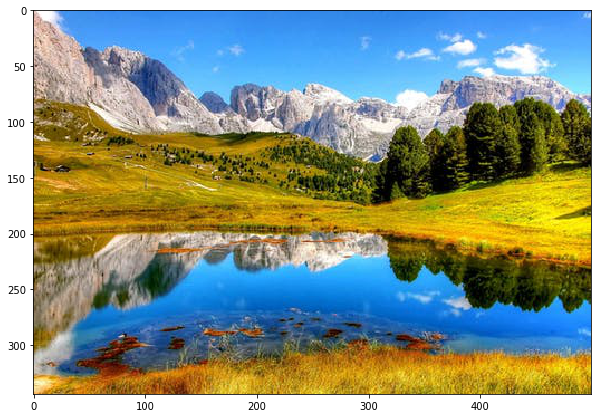

In [198]:
open_image('https://images.pexels.com/photos/371589/pexels-photo-371589.jpeg?auto=compress&cs=tinysrgb&dpr=1&w=500')

### Let's analyze few images and their results

In [248]:
def analyze_result(row):
    if not open_image(row['flickr_300k_url']):
        open_image(row['flickr_original_url'])
    display(HTML("<h3>Question:<h3>"))
    display(HTML(row.question))
    display(HTML("<h3>Answer by LoRRA<h3>"))
    display(HTML(row.answer))
    display(HTML("<h3>Answers in validation set:<h3>"))
    for answer in row.answers:
        display(HTML(answer))
    display(HTML("<h3>question tokens in validations: <h3>"))
    for token in row.question_tokens:
        display(HTML(token))
    display(HTML("<h3>OCR tokens in validations: <h3>"))
    if len(row.ocr_tokens) > 0:
        for token in row.ocr_tokens:
            display(HTML(token))
    else:
        display(HTML('None'))
    display(HTML('<hr>'))
    #print(row.ocr_info)

    

In [249]:
val_subset = val.sample(10)

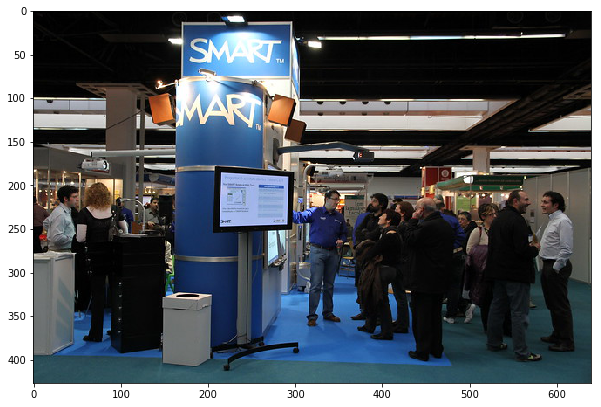

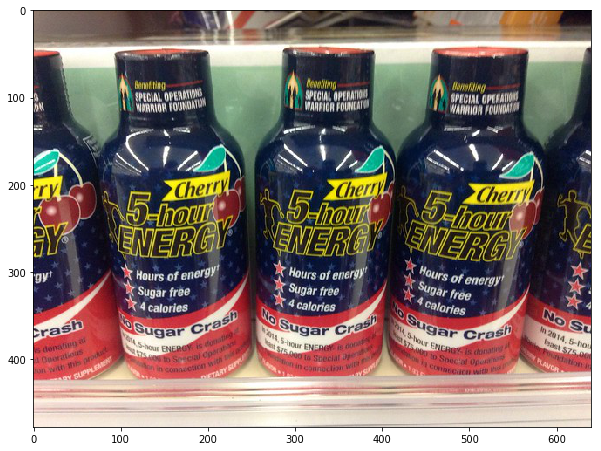

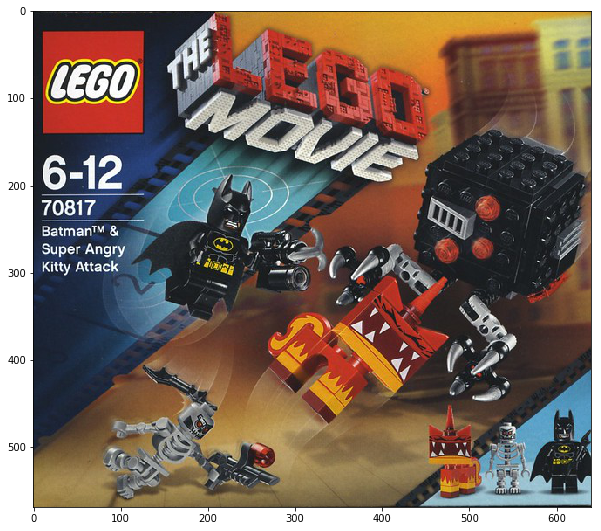

Can't open image url: https://c8.staticflickr.com/4/3687/10955538486_5ef573daf2_z.jpg
Can't open image url: https://farm6.staticflickr.com/3687/10955538486_f203233da2_o.jpg


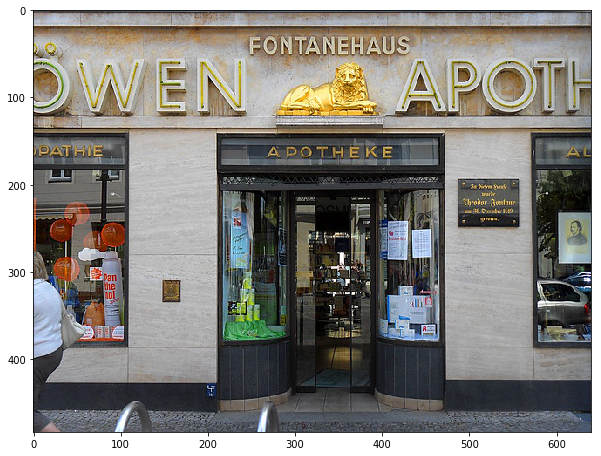

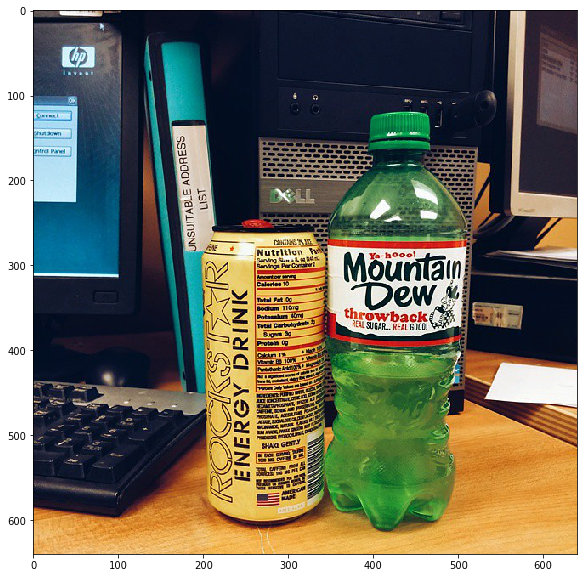

Can't open image url: https://c8.staticflickr.com/9/8214/8265666603_11eb3c9d9d_z.jpg
Can't open image url: https://farm5.staticflickr.com/8214/8265666603_5acb252135_o.jpg


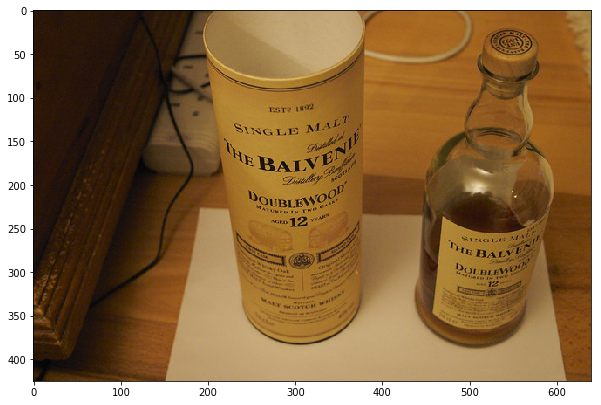

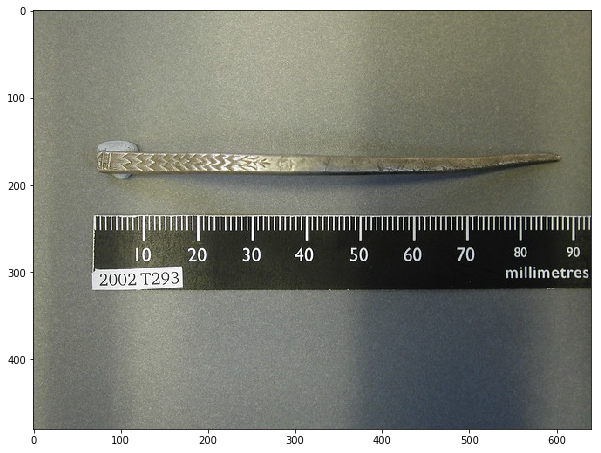

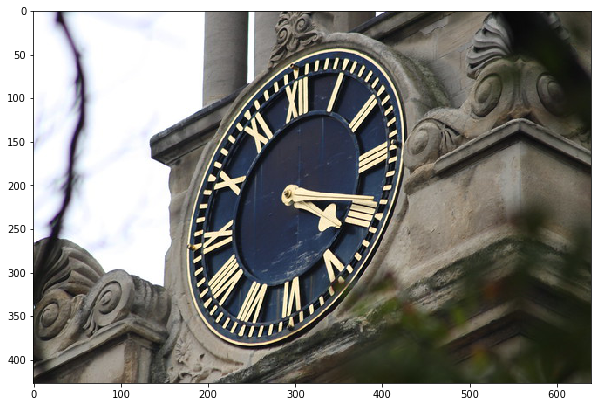

406     None
1808    None
771     None
2567    None
2919    None
4003    None
441     None
2801    None
4946    None
2169    None
dtype: object

In [250]:
val_subset.apply(analyze_result, axis=1)